In [293]:
import pandas as pd 
import numpy as np 


In [294]:
df=pd.read_csv("netflix_titles.csv")

In [295]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [296]:
df_types=df[df['type']=='Movie']

In [297]:
df_types.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [298]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [299]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

df.dropna(inplace=True)

df.drop_duplicates(inplace= True)

In [300]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [302]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
 # datetime veri dönüşümü yapılmıştır
df['data_added_day'] = df['date_added'].dt.day

df['month_added']=df['date_added'].dt.month # ay bilgileri ayrıldı
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added']=df['date_added'].dt.year

df.head(10) 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added_day,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,September,2021.0
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,September,2021.0
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,September,2021.0
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,September,2021.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24.0,9.0,September,2021.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,September,2021.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24.0,9.0,September,2021.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,24.0,9.0,September,2021.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24.0,9.0,September,2021.0


In [303]:
df['data_added_year'] = df['date_added'].dt.year

In [304]:
df.drop('date_added', axis=1, inplace=True)

Visualize

In [305]:
import seaborn as sns 
import matplotlib.pyplot as plt 

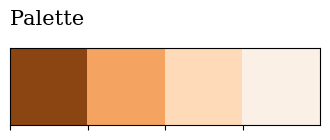

In [306]:
# Palette
sns.palplot(['saddlebrown', 'sandybrown', 'peachpuff','linen'])

plt.title("Palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

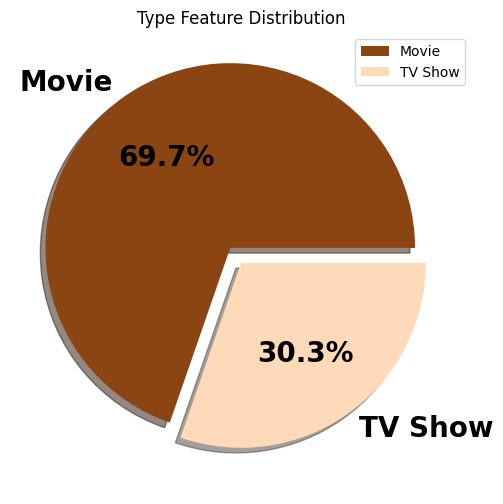

In [307]:
plt.figure(figsize=(10, 6)) 
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().keys(), explode=[0.1,0.0],autopct='%1.1f%%', textprops={'fontsize': 20, 'fontweight': 'bold'}, colors=['saddlebrown', 'peachpuff'], shadow=True) 
plt.title('Type Feature Distribution')
plt.legend(loc = 1)
plt.show()

En Çok İzlenenler:
title
Dick Johnson Is Dead                                1
Cooked                                              1
My Beautiful Broken Brain                           1
Pee-wee's Big Holiday                               1
Netflix Presents: The Characters                    1
Your lie in April                                   1
Crouching Tiger, Hidden Dragon: Sword of Destiny    1
Marvel Super Hero Adventures: Frost Fight!          1
Care Bears & Cousins                                1
Ip Man 3                                            1
Name: count, dtype: int64


C:\Users\sevgi\AppData\Local\Temp\ipykernel_6092\1498801642.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.index, y=top_titles.values, palette='Set2')


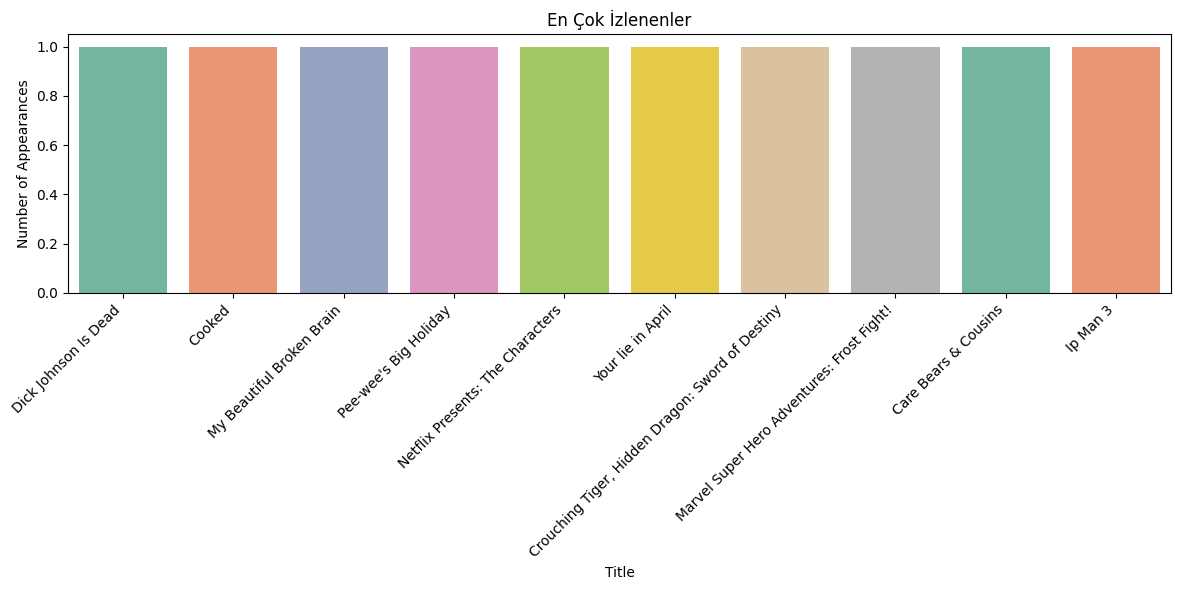

In [308]:
# En Çok İzlenenlerr

top_titles = df['title'].value_counts().head(10)
print("En Çok İzlenenler:")
print(top_titles)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_titles.index, y=top_titles.values, palette='Set2')
plt.xlabel('Title')
plt.ylabel('Number of Appearances')
plt.title('En Çok İzlenenler')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En fazla içeriğe sahip ilk 10 yönetmen:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: count, dtype: int64


C:\Users\sevgi\AppData\Local\Temp\ipykernel_6092\3715195035.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index, y=top_directors.values, palette='Set2')


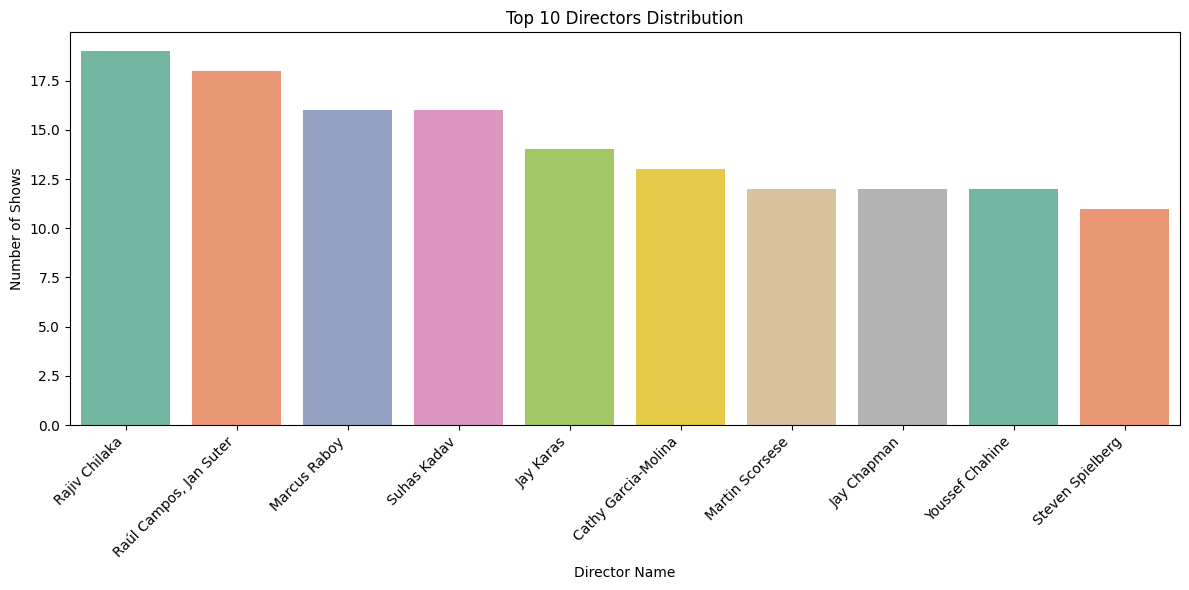

In [309]:
# No Data olan satırları filtreledik
df_filtered = df[df['director'] != 'No Data']

# Filtrelenmiş verilerle en çok tekrar eden ilk 10 yönetmen bulundu
top_directors = df_filtered['director'].value_counts().head(10)

print("En fazla içeriğe sahip ilk 10 yönetmen:")
print(top_directors)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='Set2')
plt.xlabel('Director Name')
plt.ylabel('Number of Shows')
plt.title('Top 10 Directors Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 countries represented in the dataset:
country
United States     3638
India              972
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


C:\Users\sevgi\AppData\Local\Temp\ipykernel_6092\3098275551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values,  palette='Set2')


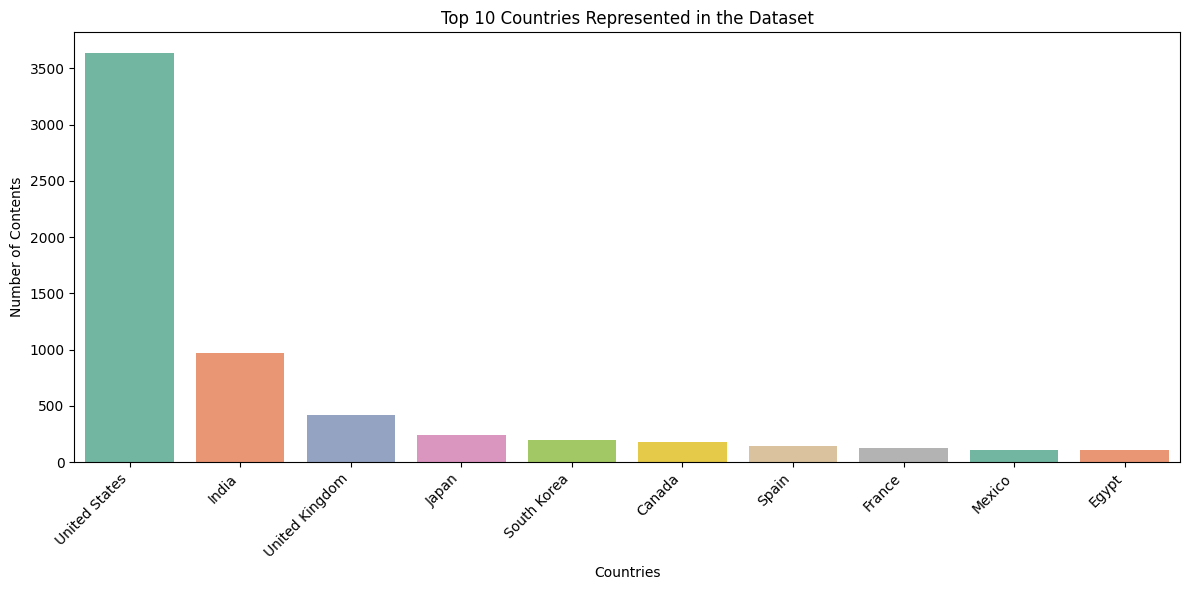

In [310]:
top_countries = df['country'].value_counts().head(10)
print("Top 10 countries represented in the dataset:")
print(top_countries)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values,  palette='Set2')
plt.xlabel('Countries')
plt.ylabel('Number of Contents')
plt.title('Top 10 Countries Represented in the Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\sevgi\AppData\Local\Temp\ipykernel_6092\3983155662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='data_added_year', data=df, order=df['data_added_year'].value_counts().index, palette='Set2')


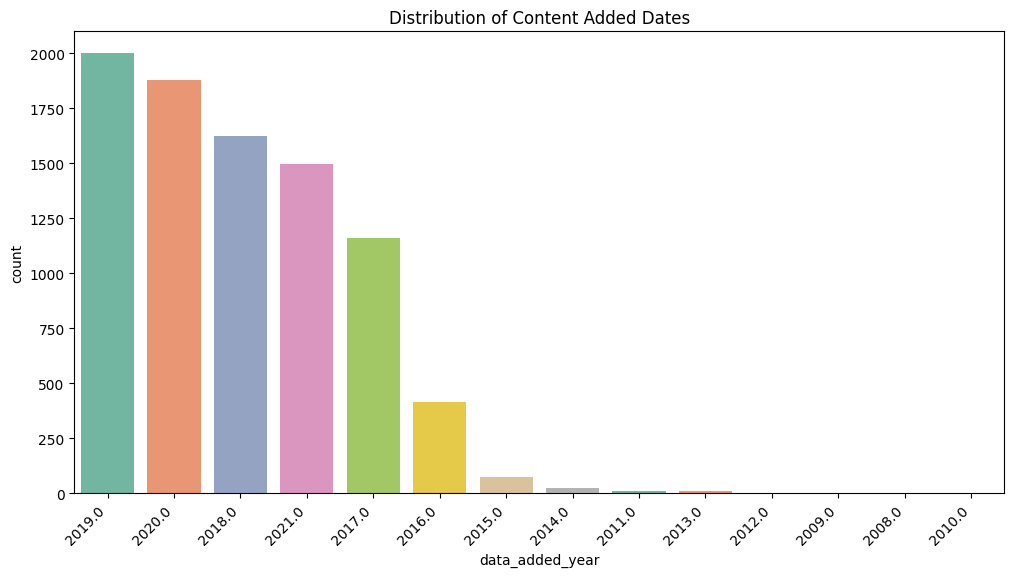

In [311]:
plt.figure(figsize=(12, 6))
sns.countplot(x='data_added_year', data=df, order=df['data_added_year'].value_counts().index, palette='Set2')
plt.title('Distribution of Content Added Dates')
plt.xticks(rotation=45, ha='right')
plt.show() 

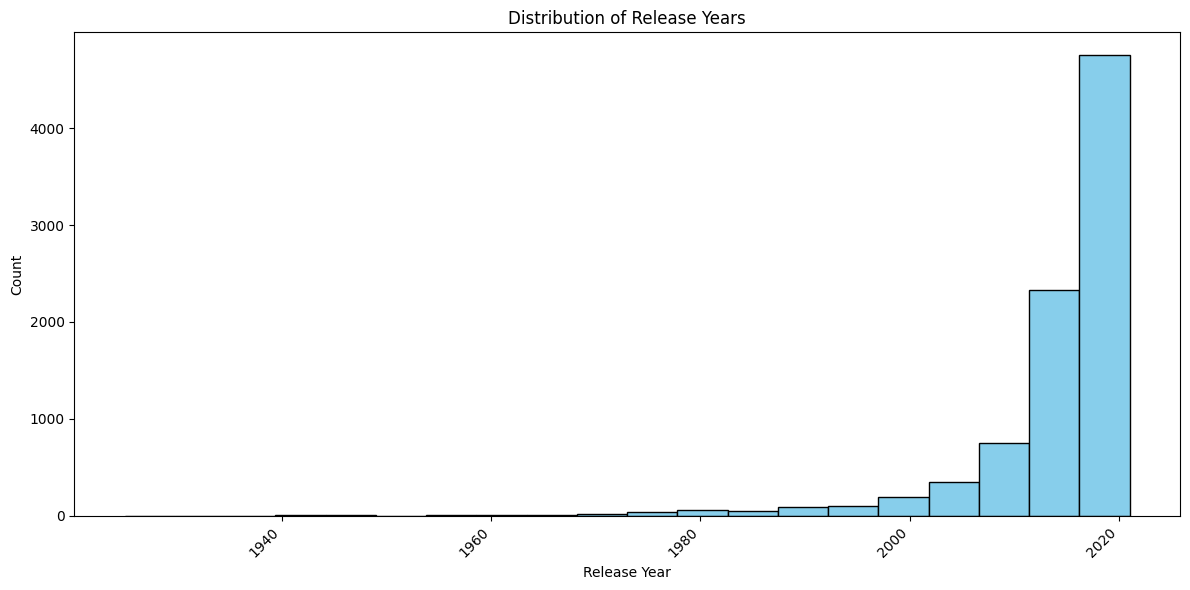

In [312]:
plt.figure(figsize=(12, 6))
plt.hist(df['release_year'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\sevgi\AppData\Local\Temp\ipykernel_6092\1265880003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='Set2')


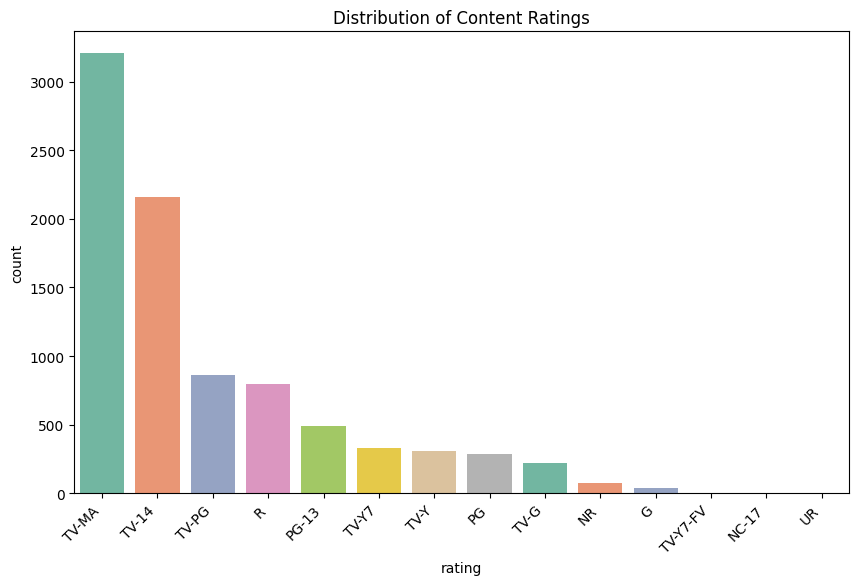

In [313]:
# Distribution of content ratings?
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='Set2')
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

In [314]:
df.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,month_added,month_name_added,year_added,data_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,September,2021.0,2021.0
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,September,2021.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,September,2021.0,2021.0


Top 10 most common content categories:
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


C:\Users\sevgi\AppData\Local\Temp\ipykernel_6092\2533987318.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='Set2')


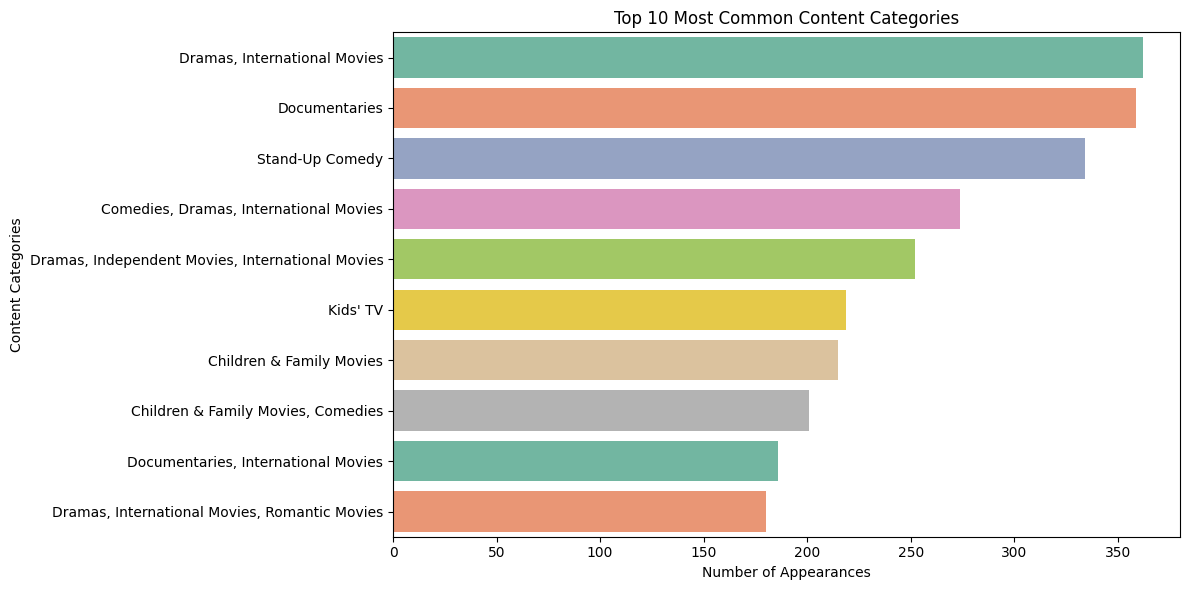

In [315]:
# Top 10 most common content categories
top_categories = df['listed_in'].value_counts().head(10)
print("Top 10 most common content categories:")
print(top_categories)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='Set2')
plt.xlabel('Number of Appearances')
plt.ylabel('Content Categories')
plt.title('Top 10 Most Common Content Categories')
plt.tight_layout()
plt.show()

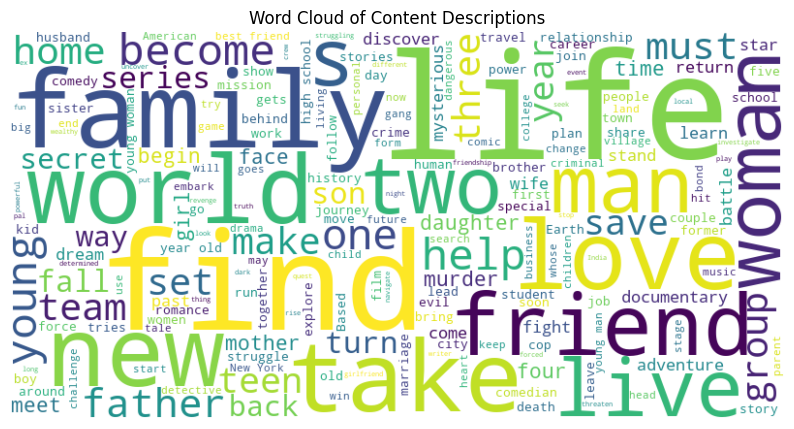

In [316]:
from wordcloud import WordCloud

# Veri çerçevesinden 'description' sütunundaki metinleri birleştir
text = ' '.join(df['description'].dropna())

# WordCloud nesnesini oluştur ve metni kullanarak bulut tablosu oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Bulut tablosunu çizdir
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content Descriptions')
plt.show()


C:\Users\sevgi\AppData\Local\Temp\ipykernel_6092\1160785864.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set2')


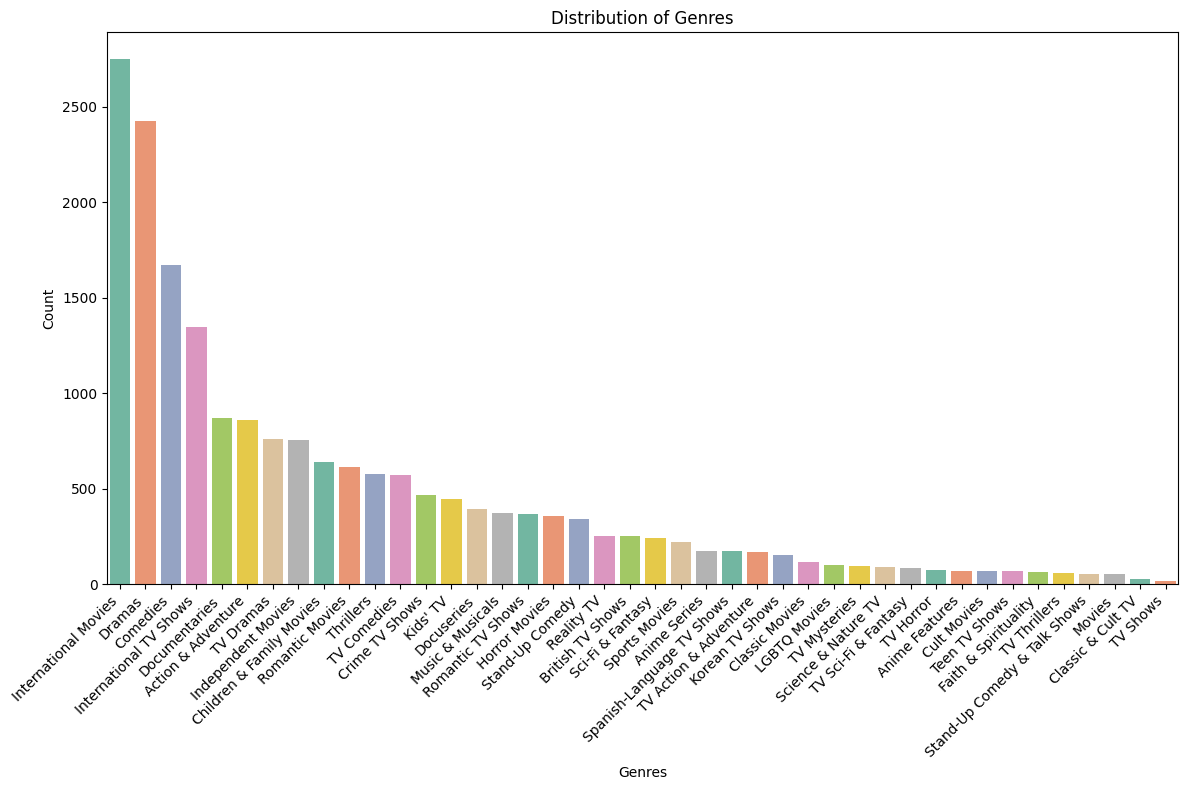

In [317]:
# Type content
genre_counts = df['listed_in'].dropna().apply(lambda x: x.split(', ')).explode().value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set2')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

Data Pre Processing and Cleaning

In [318]:
# Check duplicates data
df.duplicated().sum()

0

In [319]:
# Checking Cardinality of Categorical features
df.select_dtypes(include='object').nunique()

show_id             8790
type                   2
title               8790
director            4527
cast                7679
country              748
rating                14
duration             220
listed_in            513
description         8758
month_name_added      12
dtype: int64

In [320]:
# Missing values
df.isnull().sum()

show_id              0
type                 0
title                0
director             0
cast                 0
country              0
release_year         0
rating               0
duration             0
listed_in            0
description          0
data_added_day      88
month_added         88
month_name_added    88
year_added          88
data_added_year     88
dtype: int64

In [321]:
df_f = (df.isnull().sum()[df.isnull().sum() > 0]).to_frame().rename(columns={0:'Number of Missing Values'})
df_f['% of Missing Values'] = round(100 * df.isnull().sum()[df.isnull().sum() > 0] / len(df), 2)

In [322]:
df_f

,Number of Missing Values,% of Missing Values
data_added_day,88,1.0
month_added,88,1.0
month_name_added,88,1.0
year_added,88,1.0
data_added_year,88,1.0


In [323]:
# Visualizing Missing Numbers
import missingno as msno

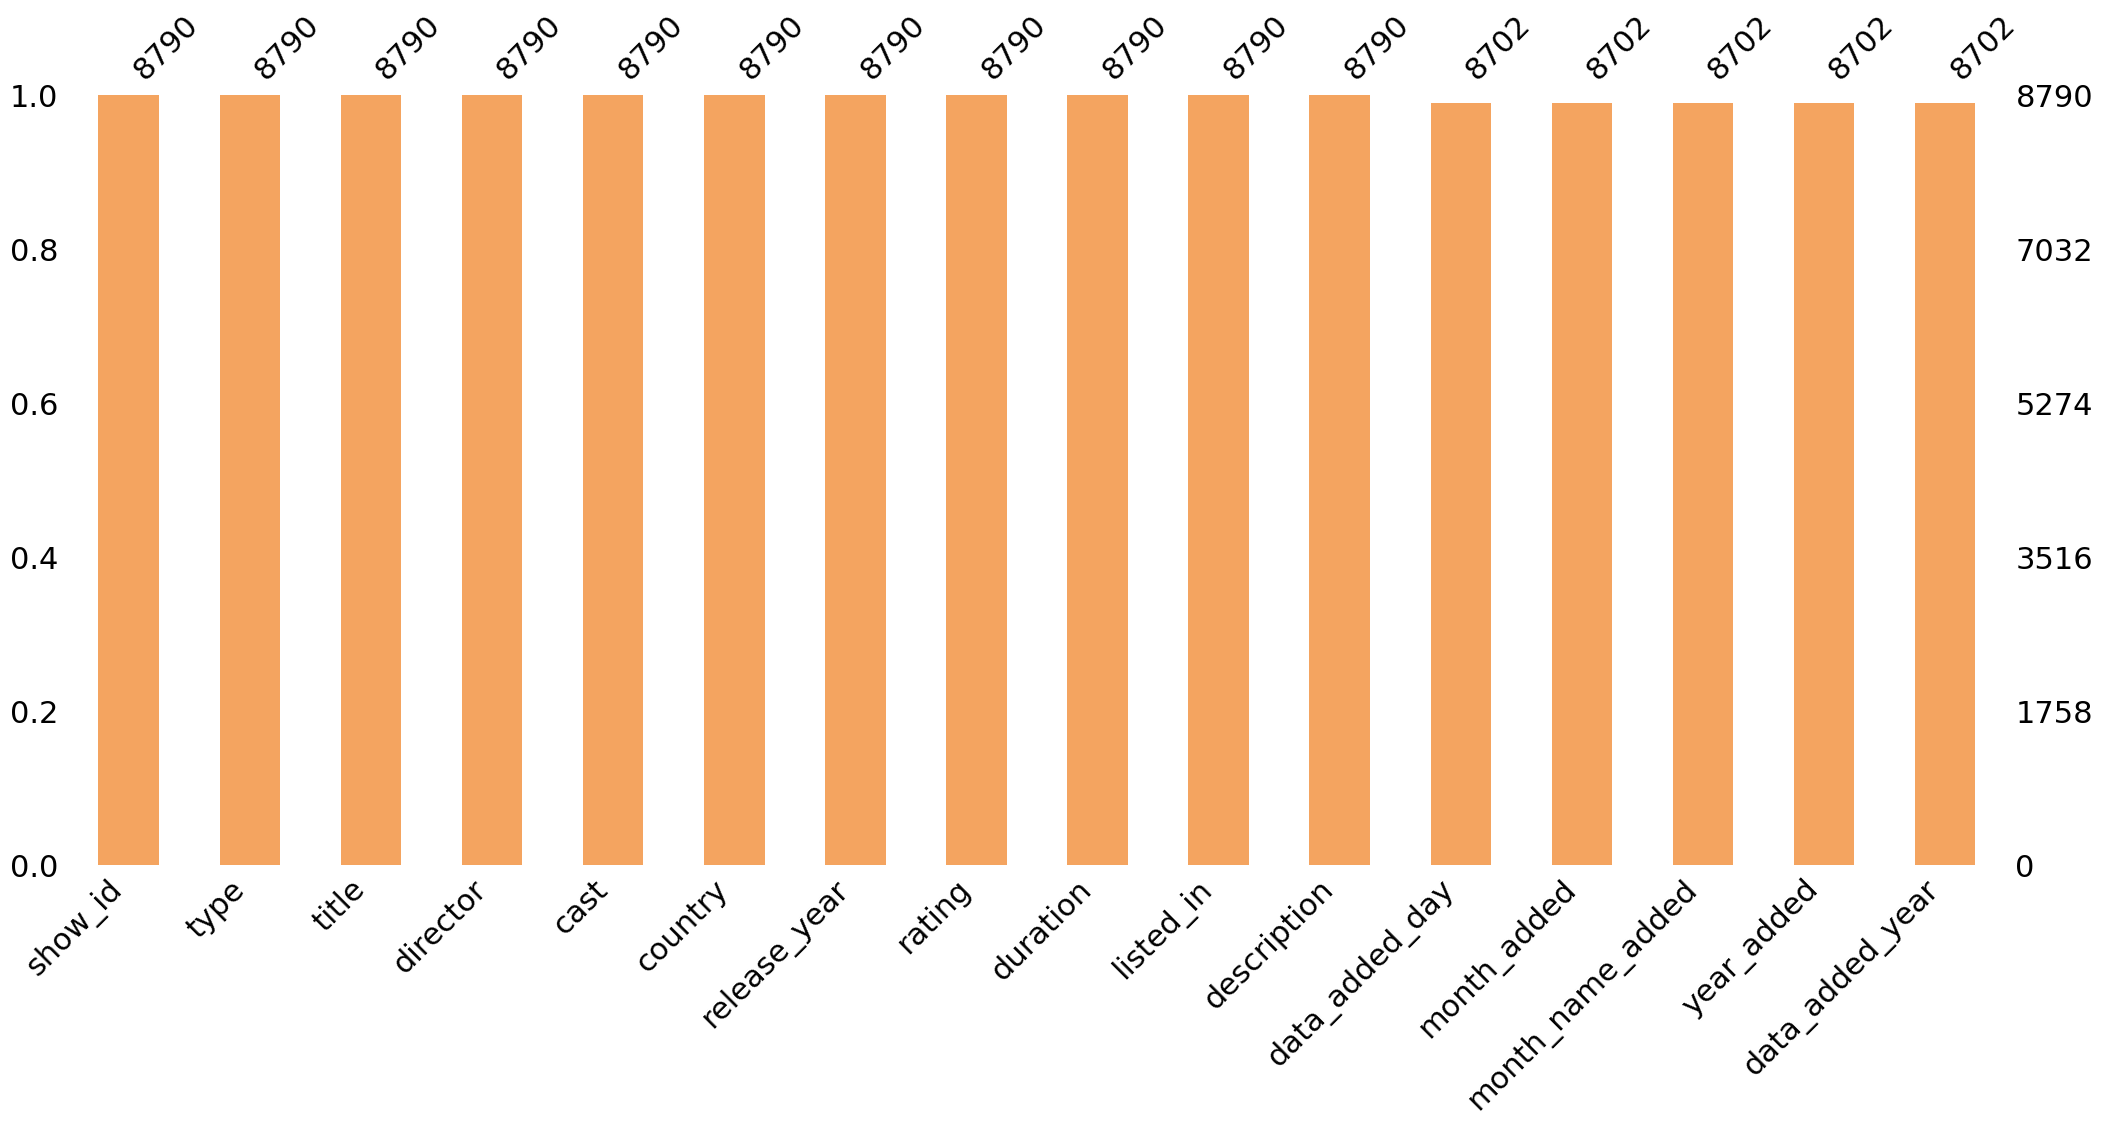

In [324]:
msno.bar(df, color='sandybrown', fontsize=22)
plt.show()

In [325]:
df.dtypes

show_id              object
type                 object
title                object
director             object
cast                 object
country              object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
data_added_day      float64
month_added         float64
month_name_added     object
year_added          float64
data_added_year     float64
dtype: object

In [326]:
#Handling Missing Values
cat_cols = [col for col in df.columns if df[col].dtype=="object"]
num_cols = [col for col in df.columns if df[col].dtype!="object"] 
float_cols=[col for col in df.columns if df[col].dtype=="float64"]

In [327]:
float_cols

['data_added_day', 'month_added', 'year_added', 'data_added_year']

In [328]:
cat_cols

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'rating',
 'duration',
 'listed_in',
 'description',
 'month_name_added']

In [329]:
num_cols

['release_year',
 'data_added_day',
 'month_added',
 'year_added',
 'data_added_year']

In [330]:
# Using Simple Imputer Library to Fill Missing Values

from sklearn.impute import SimpleImputer

In [331]:
imputer_cat=SimpleImputer(strategy="most_frequent")
imputer_num=SimpleImputer(strategy="median")
imputer_float=SimpleImputer(strategy="median")

In [332]:
df_f

,Number of Missing Values,% of Missing Values
data_added_day,88,1.0
month_added,88,1.0
month_name_added,88,1.0
year_added,88,1.0
data_added_year,88,1.0


In [333]:
def fill_missing(df_f):
    df_f[cat_cols]=imputer_cat.fit_transform(df_f[cat_cols])
    df_f[num_cols]=imputer_num.fit_transform(df_f[num_cols])
    df_f[float_cols]=imputer_num.fit_transform(df_f[num_cols])

In [334]:
df.isnull().sum()

show_id              0
type                 0
title                0
director             0
cast                 0
country              0
release_year         0
rating               0
duration             0
listed_in            0
description          0
data_added_day      88
month_added         88
month_name_added    88
year_added          88
data_added_year     88
dtype: int64

In [335]:
df.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,month_added,month_name_added,year_added,data_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,September,2021.0,2021.0
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,September,2021.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,September,2021.0,2021.0


In [336]:
df.dtypes

show_id              object
type                 object
title                object
director             object
cast                 object
country              object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
data_added_day      float64
month_added         float64
month_name_added     object
year_added          float64
data_added_year     float64
dtype: object

In [337]:
def fill_missing(df_f):
    df_f[cat_cols]=imputer_cat.fit_transform(df_f[cat_cols])
    df_f[num_cols]=imputer_num.fit_transform(df_f[num_cols])
    df_f[float_cols]=imputer_float.fit_transform(df_f[float_cols])

In [338]:
fill_missing(df)

In [339]:
df.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
release_year        0
rating              0
duration            0
listed_in           0
description         0
data_added_day      0
month_added         0
month_name_added    0
year_added          0
data_added_year     0
dtype: int64